In [115]:
import pandas as pd
import numpy as np
churn=pd.read_csv('Telco-Customer-Churn.csv')

In [116]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##### Observation:
    * Churn is our target variable
    * CustomerID - it is a unique id
    * Gender - Female or male
    * SeniorCitizen , partner, dependents,tenure, phoneservice,Multiplelines,InternetService,OnlineSecuity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges are all our given columns.

In [117]:
#let us check data types
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

##### Observation:
    * most of our data is object type
    * but in TotalCharges data type is float but it is showing object
    

In [118]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### Observation:
    There are 7043 columns and 21 columns

In [119]:
for column in churn.columns:
    print(f"{column}: Number of unique values {churn[column].nunique()}")
    print('------------------------------------------------------------')

customerID: Number of unique values 7043
------------------------------------------------------------
gender: Number of unique values 2
------------------------------------------------------------
SeniorCitizen: Number of unique values 2
------------------------------------------------------------
Partner: Number of unique values 2
------------------------------------------------------------
Dependents: Number of unique values 2
------------------------------------------------------------
tenure: Number of unique values 73
------------------------------------------------------------
PhoneService: Number of unique values 2
------------------------------------------------------------
MultipleLines: Number of unique values 3
------------------------------------------------------------
InternetService: Number of unique values 3
------------------------------------------------------------
OnlineSecurity: Number of unique values 3
------------------------------------------------------------


##### Observation:
    * Every CustomerID is unique hence we can drop it 
    * gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn have 2 unique values.
    * MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract have 3 unique values
    * PaymentMethod have 4 unique values.
    * tenure,MonthlyCharges,TotalCharges have multiple unique values

In [120]:
# let us customerid column
churn=churn.drop(['customerID'],axis=1)

In [121]:
churn.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [122]:
#let us convert object type using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
for val in list1:
    churn[val]=le.fit_transform(churn[val])

In [123]:
churn.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [124]:
churn['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [125]:
# All columns expect Churn and Totalcharges are converted into int 
# i just want specifically map target variable and want to convert TotalCharges into float type
churn['TotalCharges']= pd.to_numeric(churn['TotalCharges'],errors='coerce')

In [126]:
churn.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [127]:
churn['Churn']=churn['Churn'].map({'Yes':1,'No':0})

In [128]:
churn['Churn'].dtypes

dtype('int64')

In [129]:
churn['Churn'].unique()

array([0, 1], dtype=int64)

##### Observation:
    * TotalCharges are converted into float
    * In Churn 'Yes'=1,'No'=0

In [130]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


## Checking for missing values

In [131]:
#checking for null values
churn.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

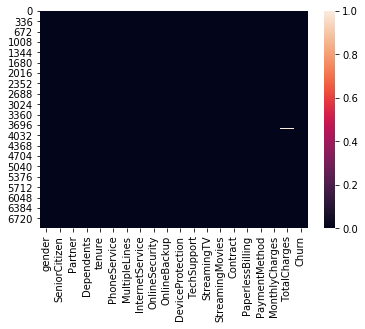

In [132]:
#using heatmap to check null values
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(churn.isnull())
plt.show()

##### Observation:
    There are null values in TotalCharges

In [133]:
#let us replace null values with mean
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='mean')
churn['TotalCharges']=imp.fit_transform(churn['TotalCharges'].values.reshape(-1,1))

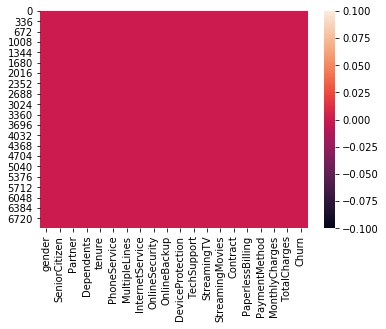

In [134]:
#using heatmap to check null values
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(churn.isnull())
plt.show()

##### Observation:
    Null values are removed.

## Summary Statistics

In [135]:
churn.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


##### observation:
    * There is some difference between mean and std in columns like 'tenure','MonthlyCharges','TotalCharges'.
    * There is some difference between 75% and max value in columns like 'tenure','Monthlycharges','TotalCharges'

### To Check The Correlation

In [136]:
chu=churn.corr()
chu

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525


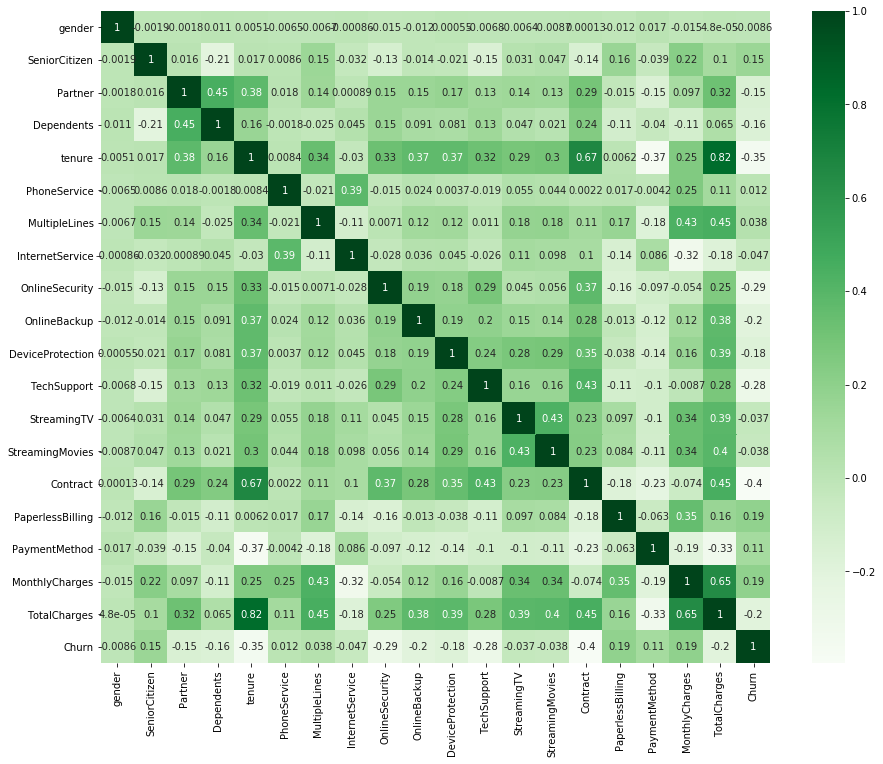

In [137]:
plt.figure(figsize=(15,12))
sns.heatmap(chu,annot=True,cmap='Greens')
plt.show()

##### Observation:
    * Our target variable is normally correlated with Onlinesecurity
    * All our data normally correlated.

## Data Visualization

### Univariate Analysis

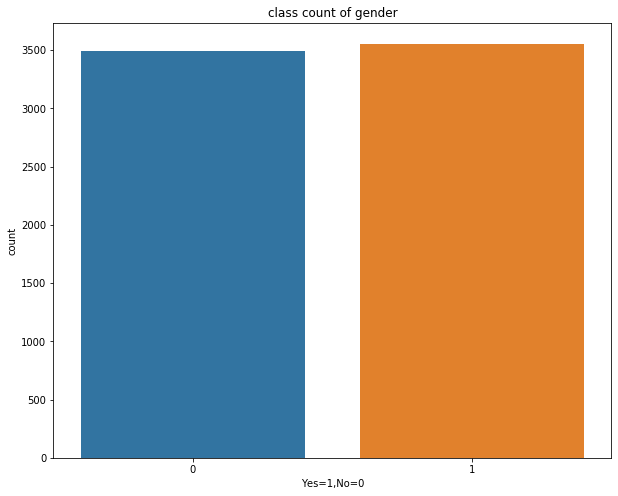

1    3555
0    3488
Name: gender, dtype: int64


In [138]:
# checking count of gender   
plt.subplots(figsize=(10,8))
sns.countplot(x='gender',data=churn)
plt.title('class count of gender')
plt.xlabel('Yes=1,No=0')
plt.ylabel('count')
plt.show()

print(churn['gender'].value_counts())

##### Observation:
    All most female amd male have same count

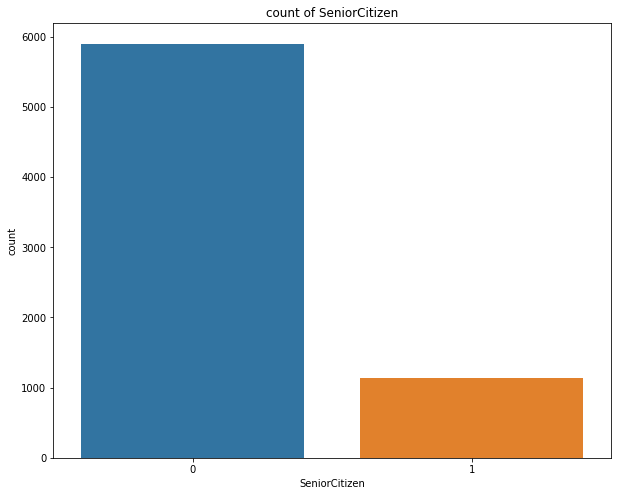

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


In [139]:
# checking class count of gender   
plt.subplots(figsize=(10,8))
sns.countplot(x='SeniorCitizen',data=churn)
plt.title('count of SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('count')
plt.show()

print(churn['SeniorCitizen'].value_counts())

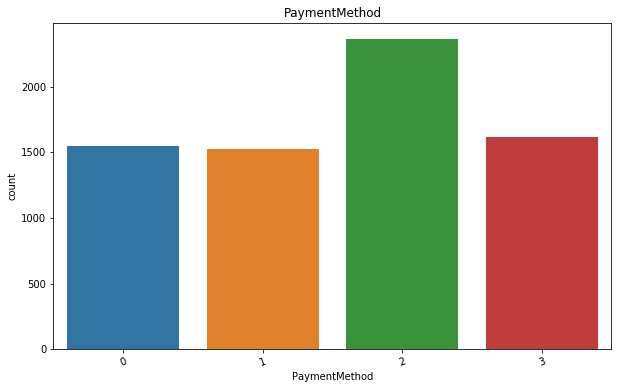

2    2365
3    1612
0    1544
1    1522
Name: PaymentMethod, dtype: int64


In [140]:
# paymentmethod plotting
plt.subplots(figsize=(10,6))
sns.countplot(x='PaymentMethod',data=churn)
plt.title('PaymentMethod')
plt.xticks(rotation=20)
plt.show()

print(churn['PaymentMethod'].value_counts())

##### Observation:
    * PaymentMethods 2 is high than other methods

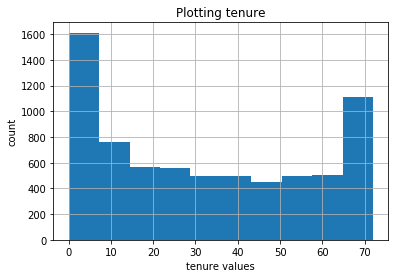

In [141]:
churn['tenure'].hist()
plt.xlabel('tenure values')
plt.ylabel('count')
plt.title('Plotting tenure')
plt.show()

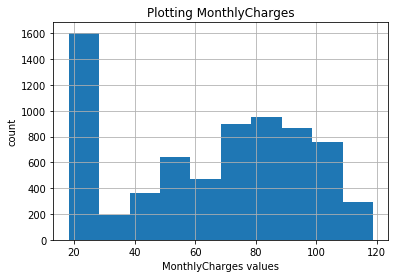

In [142]:
churn['MonthlyCharges'].hist()
plt.xlabel('MonthlyCharges values')
plt.ylabel('count')
plt.title('Plotting MonthlyCharges')
plt.show()

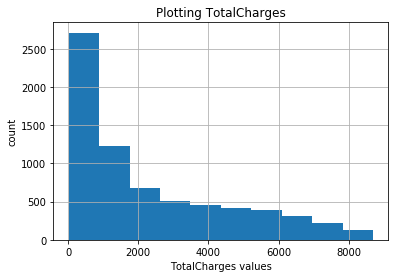

In [143]:
churn['TotalCharges'].hist()
plt.xlabel('TotalCharges values')
plt.ylabel('count')
plt.title('Plotting TotalCharges')
plt.show()

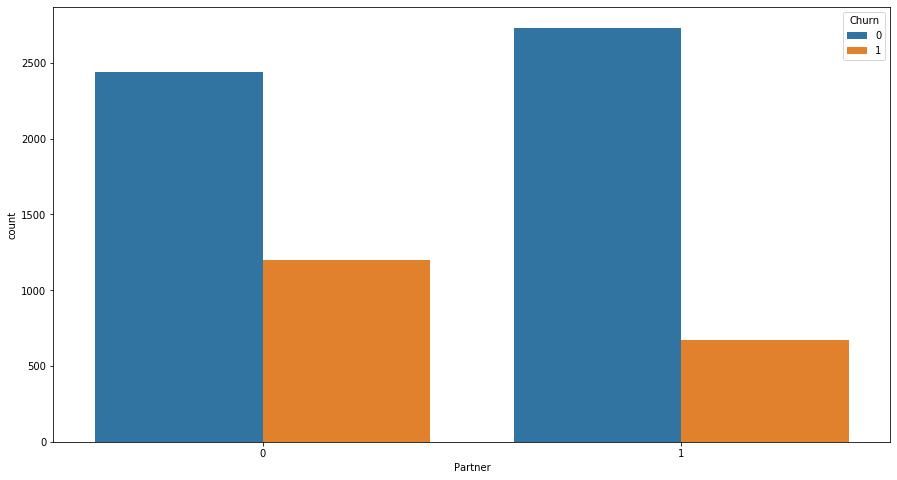

In [144]:
plt.figure(figsize=(15,8))
sns.countplot(x='Partner',hue='Churn',data=churn)
plt.show()

### Bivariate Analysis

In [145]:
churn.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

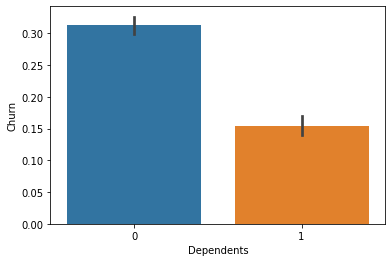

In [146]:
sns.barplot(x='Dependents',y='Churn',data=churn)
plt.show()

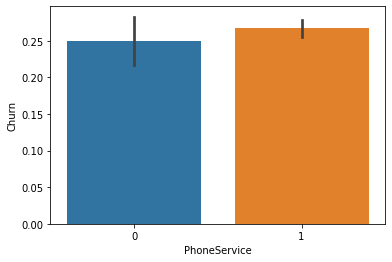

In [147]:
sns.barplot(x='PhoneService',y='Churn',data=churn)
plt.show()

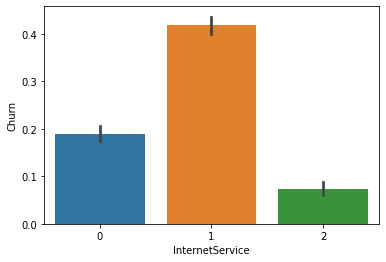

In [148]:
sns.barplot(x='InternetService',y='Churn',data=churn)
plt.show()

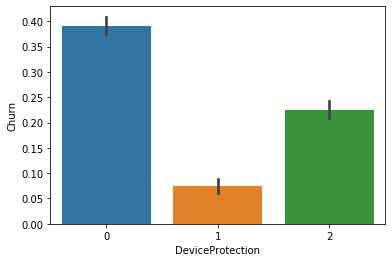

In [149]:
sns.barplot(x='DeviceProtection',y='Churn',data=churn)
plt.show()

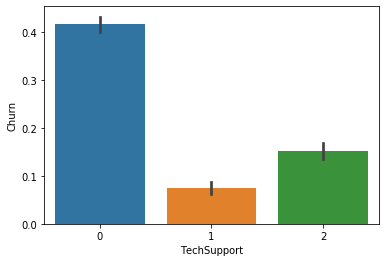

In [150]:
sns.barplot(x='TechSupport',y='Churn',data=churn)
plt.show()

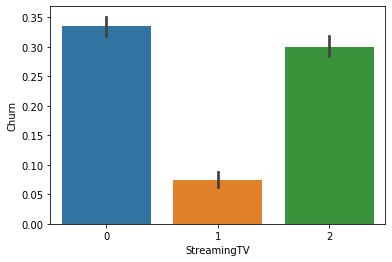

In [151]:
sns.barplot(x='StreamingTV',y='Churn',data=churn)
plt.show()

## Checking Skewness

In [152]:
churn.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

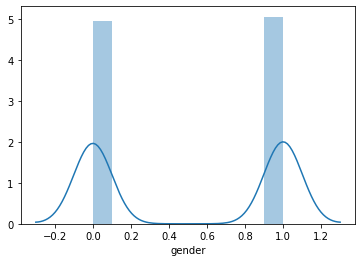

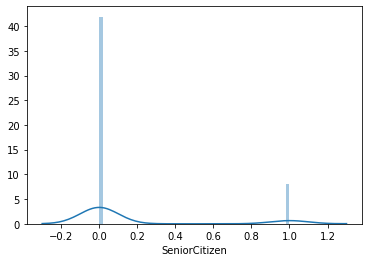

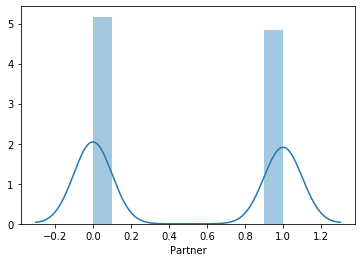

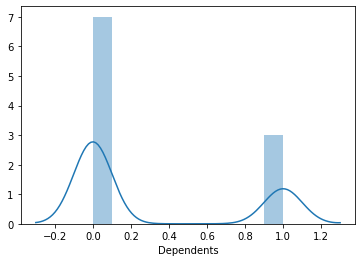

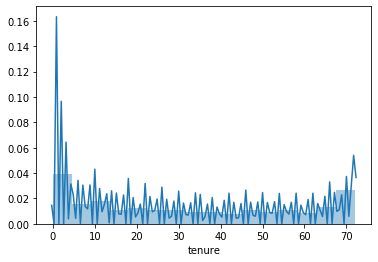

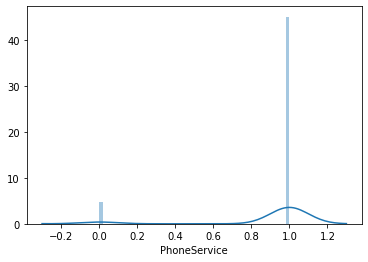

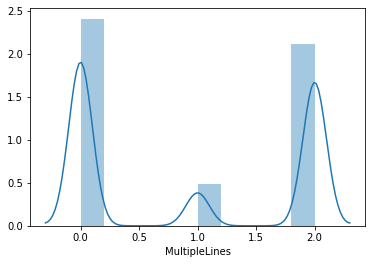

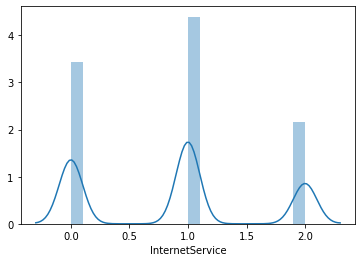

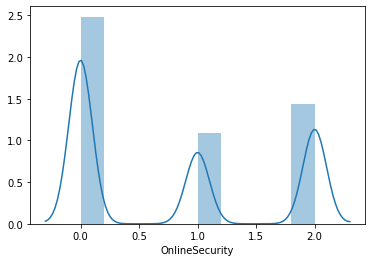

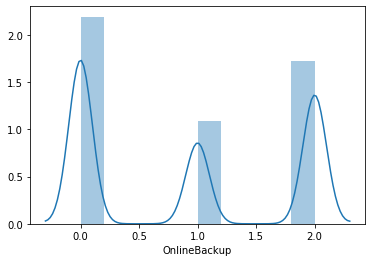

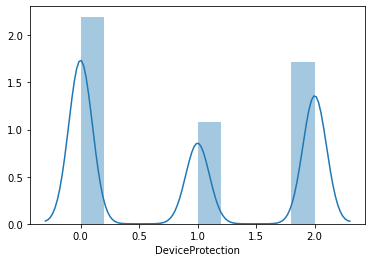

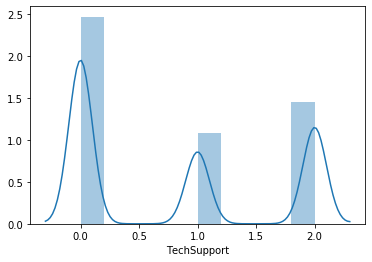

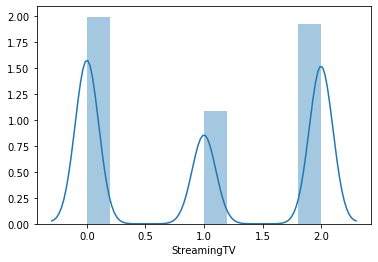

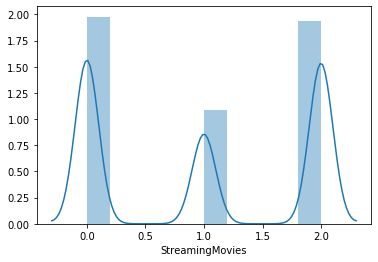

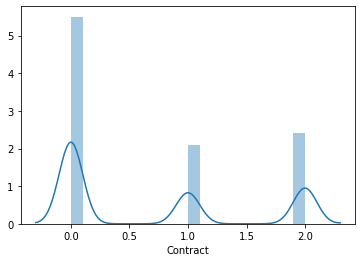

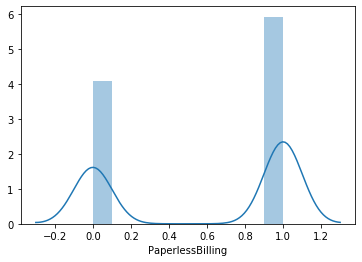

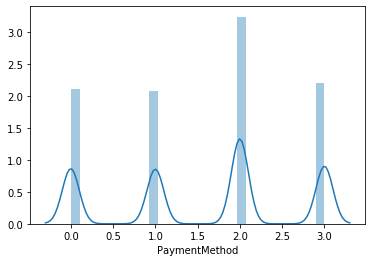

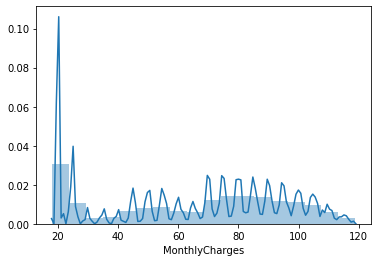

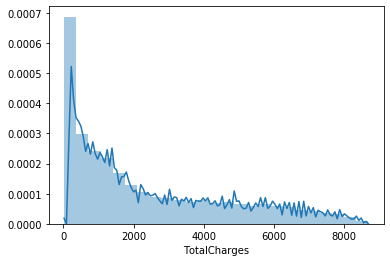

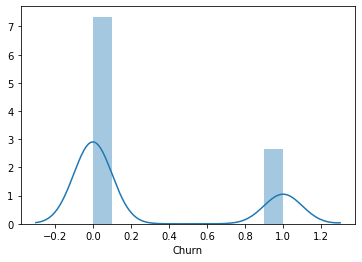

In [153]:
collist=churn.columns.values
ncol=15
nrow=10
for i in churn.columns:
    sns.distplot(churn[i],kde_kws={'bw':0.1})
    plt.show()

##### Observation:
    Data is normally skewed.

## Plotting Outliers

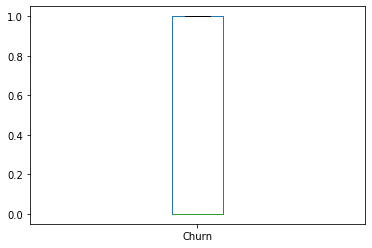

In [154]:
churn['Churn'].plot.box()

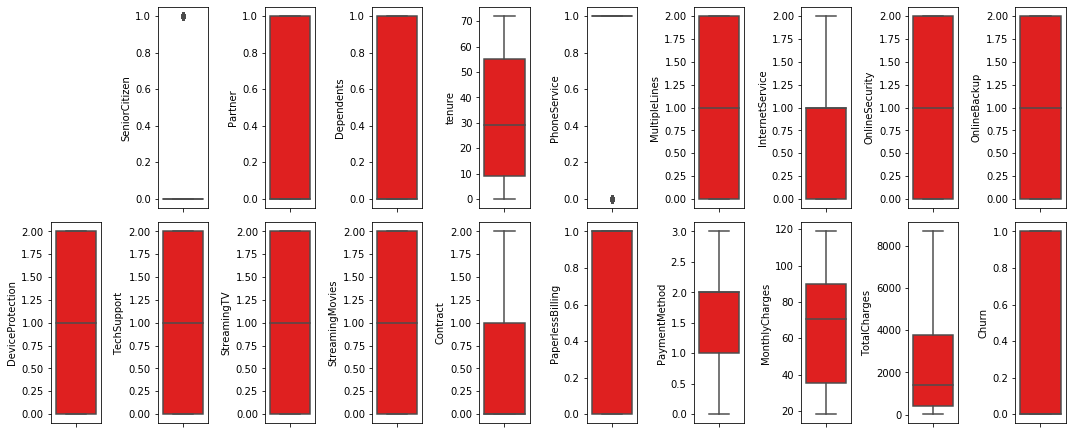

In [155]:
col=churn.columns.values
ncol=10
nrow=10
plt.figure(figsize=(15,30))
for i in  range(1,len(col)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(churn[col[i]],color='red',orient='v')
    plt.tight_layout()

## Removing Outliers

In [156]:
#Removing outliers
from scipy.stats import zscore
z_score=abs(zscore(churn))
print(churn.shape)
churn_tele=churn.loc[(z_score<3).all(axis=1)]
print(churn_tele.shape)

(7043, 20)
(6361, 20)


##### Observation:
    Some Rows are removed as outliers

## Model Training

In [158]:
churn.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1
7042,1,0,0,0,66,1,0,1,2,0,2,2,2,2,2,1,0,105.65,6844.50,0


In [159]:
#Seprating into input and output variables
df_x=churn_tele.drop(['Churn'],axis=1)

In [160]:
y=pd.DataFrame(churn_tele['Churn'])

In [161]:
df_x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40


In [162]:
y.head()

,Churn
1,0
2,1
4,1
5,1
6,0


In [163]:
#scaling the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [164]:
x.shape

(6361, 19)

In [165]:
y.shape

(6361, 1)

In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

### Finding the Best Parameters

In [168]:
from sklearn import svm
svc=svm.SVC()
parameters={'kernel':['linear','rbf','poly'],'C':[1.0]}
gd=GridSearchCV(svc,parameters)
gd.fit(x,y)
sorted(gd.cv_results_.keys())
print(gd.best_params_)

{'C': 1.0, 'kernel': 'rbf'}


##### Observation:
    c=1,kernel='rbf' are best parameters.

In [169]:
dtc=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy']}
gd=GridSearchCV(dtc,parameters)
gd.fit(x,y)
sorted(gd.cv_results_.keys())
print(gd.best_params_)

{'criterion': 'gini'}


##### Observation:
   'criterion': 'gini' is best parameter 

In [179]:
model=[LogisticRegression(),DecisionTreeClassifier(criterion='gini'),KNeighborsClassifier(),SVC(kernel='rbf'),GaussianNB(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(), BaggingClassifier(),ExtraTreesClassifier()]
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20)
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Score:')
    print('accuracy_score :',accuracy_score(y_test,predm))
    print('confusion_matrix :',confusion_matrix(y_test,predm))
    print('classification_report',classification_report(y_test,predm))
    print('*******************************************************************************************************')
    print('\n')

Score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is: 0.8046383647798742
Score:
accuracy_score : 0.805184603299293
confusion_matrix : [[827 106]
 [142 198]]
classification_report               precision    recall  f1-score   support

           0       0.85      0.89      0.87       933
           1       0.65      0.58      0.61       340

    accuracy                           0.81      1273
   macro avg       0.75      0.73      0.74      1273
weighted avg       0.80      0.81      0.80      1273

*******************************************************************************************************


Score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                   

##### Observation:
    * score of LogisticRegression        = 80%  and accuracy score = 80%
    * score of DecisionTreeClassifier    = 99%  and accuracy score = 73%
    * score of KNeighborsClassifier      = 83%  and accuracy score = 76%         
    * Score of SVC                       = 81%  and accuracy score = 79%
    * Score of GaussianNB                = 75%  and accuracy score = 76%    
    * Score of RandomForestClassifier    = 99%  and accuracy socre = 79%
    * Score of AdaBoostClassifier        = 81%  and accuracy score = 81%
    * Score of GradientBoostingClassifier= 81%  and accuracy score = 80%
    * Score of BaggingClassifier         = 78%  and accuracy score = 78%
    * Score of ExtraTreesClassifier      = 99%  and accuracy score = 78%

From above observation AdaBoostClassifier gives best accuracy score

In [181]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),DecisionTreeClassifier(criterion='gini'),KNeighborsClassifier(),SVC(kernel='linear'),GaussianNB(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(), BaggingClassifier(),ExtraTreesClassifier()]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print('Score of',m,'is:',score)
    print('Mean score:',score.mean())
    print('Standard deviation:',score.std())
    print('*******************************************************************************************************')
    print('\n')

Score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is: [0.80911233 0.81132075 0.78694969 0.80581761 0.80424528]
Mean score: 0.8034891332809636
Standard deviation: 0.008631356423023049
*******************************************************************************************************


Score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitte

##### Observation:
    All our data is well trained .
    Selecting AdaBoostClassifier as our best model

In [182]:
# AdaBoostClassifier with best result
abc=AdaBoostClassifier(random_state=42)
abc.fit(x_train,y_train)
abc.score(x_train,y_train)
predabc=abc.predict(x_test)
print(accuracy_score(y_test,predabc))
print(confusion_matrix(y_test,predabc))
print(classification_report(y_test,predabc))

0.8114689709347996
[[827 106]
 [134 206]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       933
           1       0.66      0.61      0.63       340

    accuracy                           0.81      1273
   macro avg       0.76      0.75      0.75      1273
weighted avg       0.81      0.81      0.81      1273



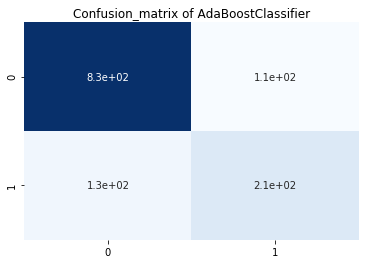

In [184]:
#plotting confusion matrix for AdaBoostClassifier
cm=confusion_matrix(y_test,predabc)
sns.heatmap(cm,annot=True,cbar=False,cmap='Blues')
plt.title("Confusion_matrix of AdaBoostClassifier")
plt.show()

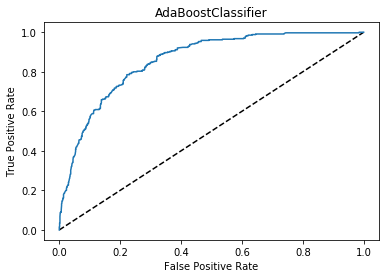

0.7461351743269655


In [187]:
#AUC_ROC curve and finding auc score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=abc.predict_proba(x_test)[:,1]
fpr,tpr,thredholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoostClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoostClassifier')
plt.show()

auc_score=roc_auc_score(y_test,predabc)
print(auc_score)

## Saving The Best Model

In [185]:
import joblib
#save the best model to a pickel in a file
joblib.dump(abc,'Telecom_customer_churn.pkl')

['Telecom_customer_churn.pkl']

##### Conclusion:
    AdaBoostClassifier is save as pickel file